In [ ]:
dataset = read.csv('Salary_Data.csv')

Warning message in file(file, "rt"):
“cannot open file 'Salary_Data.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
# Splitting the dataset into the Training set and Test set
install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Salary, SplitRatio = 2/3)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Feature Scaling
training_set = scale(training_set)
test_set = scale(test_set)


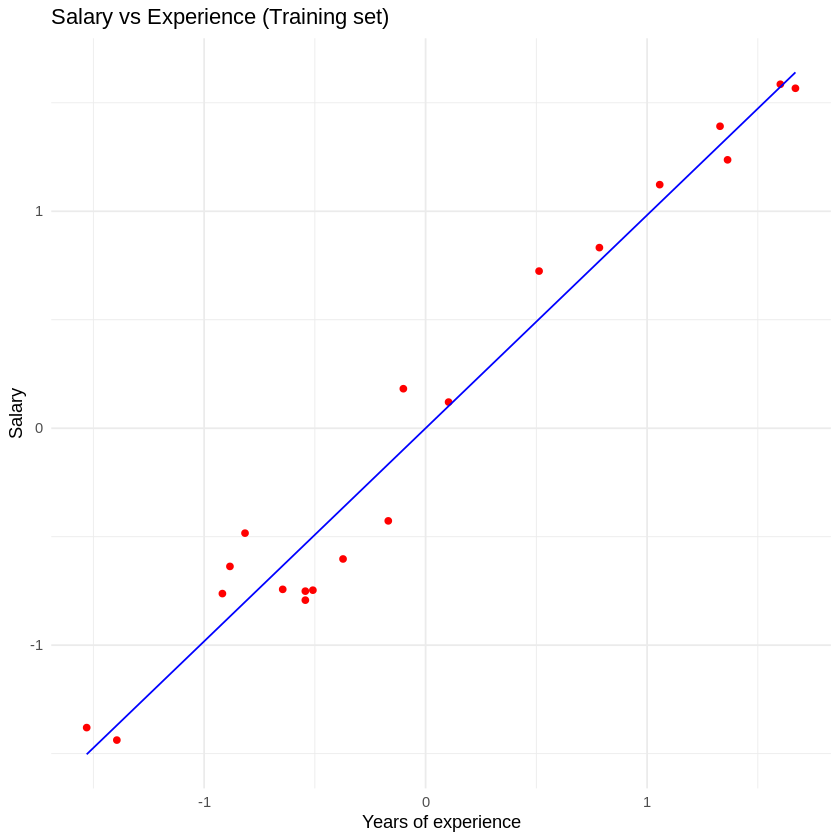

In [ ]:
# Convert the training_set and test_set to data frames if they're not already
training_set <- as.data.frame(training_set)
test_set <- as.data.frame(test_set)

# Fitting Simple Linear Regression to the Training set
regressor <- lm(formula = Salary ~ YearsExperience, data = training_set)

# Predicting the Test set results
y_pred <- predict(regressor, newdata = test_set)

# Visualising the Training set results
library(ggplot2)
ggplot(training_set, aes(x = YearsExperience, y = Salary)) +
  geom_point(color = 'red') +
  geom_line(aes(y = predict(regressor, newdata = training_set)), color = 'blue') +
  ggtitle('Salary vs Experience (Training set)') +
  xlab('Years of experience') +
  ylab('Salary') +
  theme_minimal()


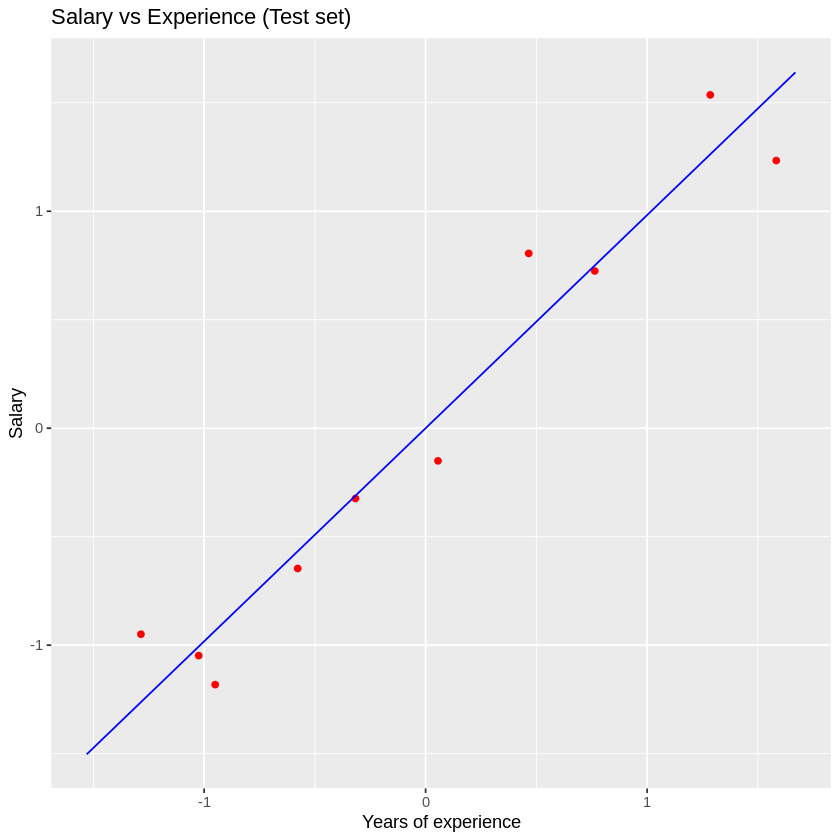

In [ ]:
# Visualising the Test set results
library(ggplot2)
ggplot() +
  geom_point(aes(x = test_set$YearsExperience, y = test_set$Salary),
             colour = 'red') +
  geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)),
            colour = 'blue') +
  ggtitle('Salary vs Experience (Test set)') +
  xlab('Years of experience') +
  ylab('Salary')